In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Simple Marimekko

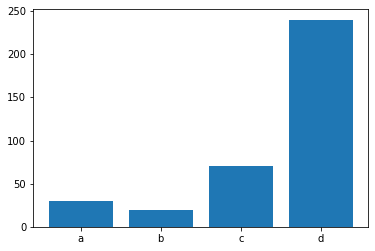

In [2]:
y = np.array([.3, .4, .7, .8]) * np.array([100., 50., 100., 300.])
x_label = ['a','b','c', 'd']
plt.bar(x_label, y)
plt.show()

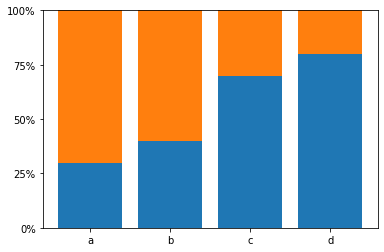

In [3]:
y = [.3, .4, .7, .8]
x_label = ['a','b','c', 'd']

plt.bar(x_label, y) # bottom bar
plt.bar(x_label, np.ones(len(y))-y, bottom=y) # top bar

plt.ylim(0,1)
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])

plt.show()

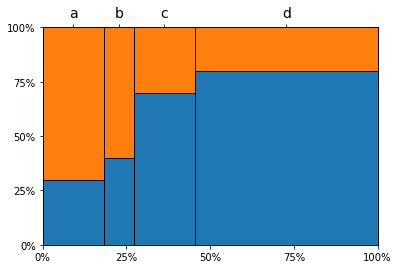

In [4]:
fig, ax = plt.subplots(1)
y = [.3, .4, .7, .8]
x = [100, 50, 100, 300]
x_label = ['a','b','c', 'd']
width = [i/sum(x) for i in x]

# calculate x coordinates based on the width of the previous bars
# same as: [0, width[0], width[0] + width[1], width[0] + width[1] + width[2]]
adjusted_x, temp = [0], 0
for i in width[:-1]:
    temp += i
    adjusted_x.append(temp)

# Marimekko chart
plt.bar(adjusted_x, y, width=width, align='edge', edgecolor='black')
plt.bar(adjusted_x, np.ones(len(y))-y, bottom=y, width=width, align='edge', edgecolor='black')

# x and y ticks (%)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

plt.ylim(0,1)
plt.xlim(0,1)

# twin y-axis to draw x-ticks at the top
axy = ax.twiny()
axy.set_xticks([(width[i]/2)+ v for i, v in enumerate(adjusted_x)])
axy.set_xticklabels(x_label, fontsize=14)

plt.show()

## World Bank Indicators
Pandas Data frames

In [5]:
# countries from https://data.worldbank.org/country
all_countries = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 
                 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 
                 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 
                 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 
                 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 
                 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 
                 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 
                 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 
                 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 
                 'Central African Republic', 'Chad', 'Channel Islands', 
                 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 
                 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 
                 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 
                 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 
                 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 
                 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 
                 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 
                 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 
                 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 
                 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 
                 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 
                 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland', 
                 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 
                 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 
                 'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kosovo', 
                 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon', 
                 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 
                 'Luxembourg', 'Macao SAR, China', 'Madagascar', 'Malawi', 
                 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 
                 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia, Fed. Sts.', 
                 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 
                 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 
                 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 
                 'North Macedonia', 'Northern Mariana Islands', 'Norway', 'Oman', 
                 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 
                 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 
                 'Romania', 'Russian Federation', 'Rwanda', 'Samoa', 'San Marino', 
                 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 
                 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 
                 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'Somalia', 
                 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 
                 'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)', 
                 'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Sweden', 
                 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Tanzania', 
                 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 
                 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 
                 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 
                 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 
                 'Vietnam', 'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 
                 'Zambia', 'Zimbabwe']

eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 
      'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 
      'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
      'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden']

la_c = ['Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas, The', 'Barbados', 'Belize', 
        'Bolivia', 'Brazil', 'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia', 
        'Costa Rica', 'Cuba', 'Curacao', 'Dominica', 'Dominican Republic', 'Ecuador', 
        'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 
        'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 
        'Sint Maarten (Dutch Part)', 'St. Kitts And Nevis', 'St. Lucia', 
        'St. Martin (French Part)','St. Vincent and The Grenadines', 'Suriname', 
        'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'Venezuela, Rb', 
        'Virgin Islands (U.S.)']

# countries to highlight
highlight_all = ['China', 'India', 'United States', 'Russian Federation', 
                 'Brazil', 'Indonesia', 'Nigeria']

highlight_eu = ['Austria', 'Belgium', 'Czech Republic', 'France', 'Germany',
                'Italy', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden']

highlight_la_c = ['Argentina', 'Brazil', 'Mexico', 'Guatemala', 
                  'Colombia', 'Bolivia']
# countries dict
countries_dict = {"All":all_countries,
                  "European Union": eu, 
                  "Latin America & Caribbean": la_c}

highlights_dict = {"All":highlight_all,
                  "European Union": highlight_eu, 
                  "Latin America & Caribbean": highlight_la_c}

# datasets and details dict
var_dict = {'Rural Population':
                {'file':'API_SP.RUR.TOTL.ZS_DS2_en_csv_v2_2166125.csv',
                 'label':'Rural Pop. (%)',
                 'legend':['Rural Population', 'Urban Population']}, 
            'Access to Electricity':
                {'file':'API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_2164123.csv',
                 'label':'Access to Electricity (%)',
                 'legend':['Access to Electricity', 'No Access to Electricity']},
            'Literacy':
                {'file':'API_SE.ADT.LITR.ZS_DS2_en_csv_v2_2163525.csv',
                 'label':'Literacy Rate (age +15)',
                 'legend':['Literate Pop.', 'Illiterate Pop.']},
            'Unemployment':
                {'file':'API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_2163385.csv',
                 'label':'Unemployment (ILO Estimate)',
                 'legend':['Unemployed', 'Employed']}}

### Cleaning

In [6]:
pop_file = 'API_SP.POP.TOTL_DS2_en_csv_v2_2163507.csv'

df = pd.read_csv('../data/'+pop_file)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN,NaN


In [7]:
####################
###### Inputs ######
####################

year = 2018
countries_select = "All"
indicator = 'Rural Population'
countries = countries_dict[countries_select]
highlight = highlights_dict[countries_select]

In [8]:
##################
###### DATA ######
##################
pop_file = 'API_SP.POP.TOTL_DS2_en_csv_v2_2163507.csv'

df = pd.read_csv('../data/'+pop_file)
var_df = pd.read_csv('../data/'+var_dict[indicator]['file'])

df = df.merge(var_df, 
              left_on='Country Name', 
              right_on='Country Name', 
              suffixes=['_pop', '_var_df'])

# remove non-countries
df = df[df['Country Name'].isin(countries)]

# remove rows with empty values for the indicator or population
df = df[(df['{}_var_df'.format(year)].notna() & df['{}_pop'.format(year)].notna())]

# sort rows by the indicator values 
df.sort_values('{}_var_df'.format(year), inplace=True)

df[['Country Name', '{}_var_df'.format(year), '{}_pop'.format(year)]]

,Country Name,2018_var_df,2018_pop
125,Kuwait,0.000,4137312.0
177,Nauru,0.000,12704.0
94,"Hong Kong SAR, China",0.000,7451000.0
223,Sint Maarten (Dutch part),0.000,40654.0
25,Bermuda,0.000,63920.0
...,...,...,...
166,Malawi,83.063,18143315.0
171,Niger,83.575,22442948.0
135,Liechtenstein,85.662,37910.0
187,Papua New Guinea,86.831,8606316.0


### Plotting

<BarContainer object of 214 artists>

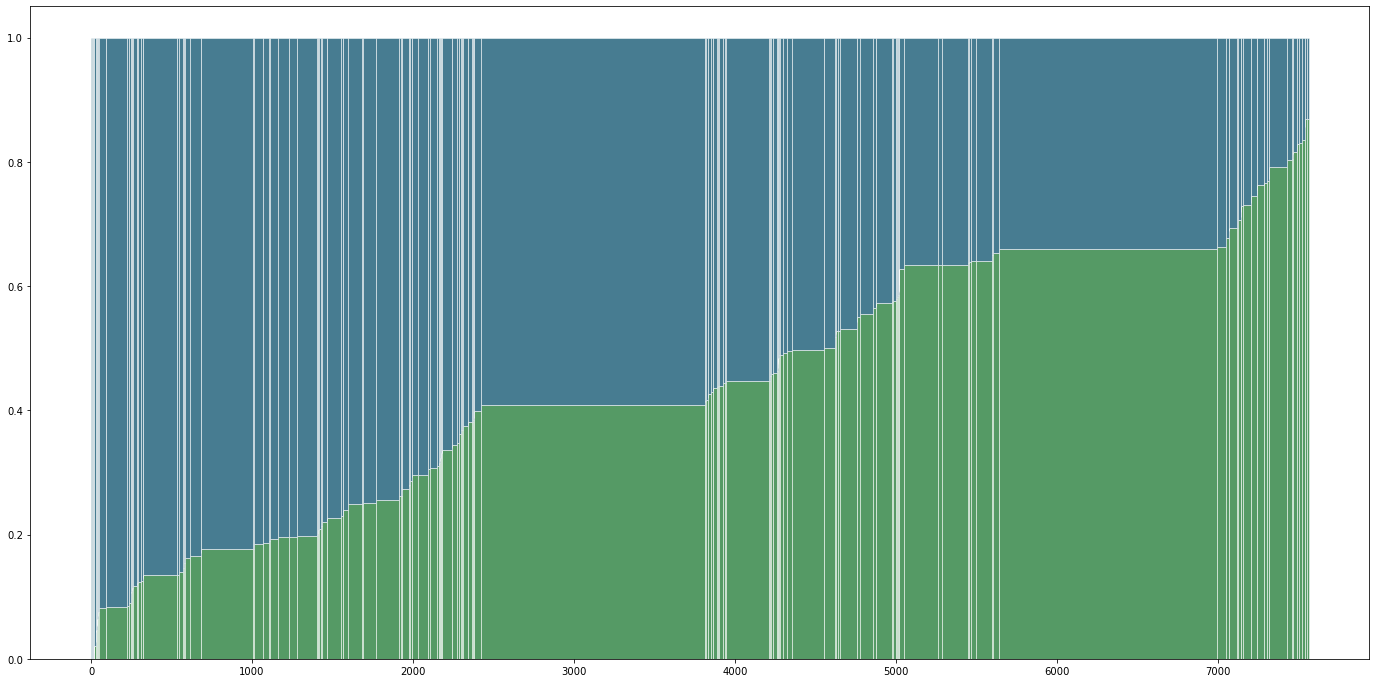

In [13]:
##########################
########## PLOT ##########
##########################
# define figure and axis
fig, ax = plt.subplots(1, figsize=(24,12))

# var_df bars
plt.bar(x, y, align='edge', width=width, edgecolor='w', linewidth = 0.5, color='#559A65')
plt.bar(x, np.ones(len(y))-y, bottom=y, align='edge', width=width, edgecolor='w', linewidth = 0.5, color='#477C91')

### All together / Add details

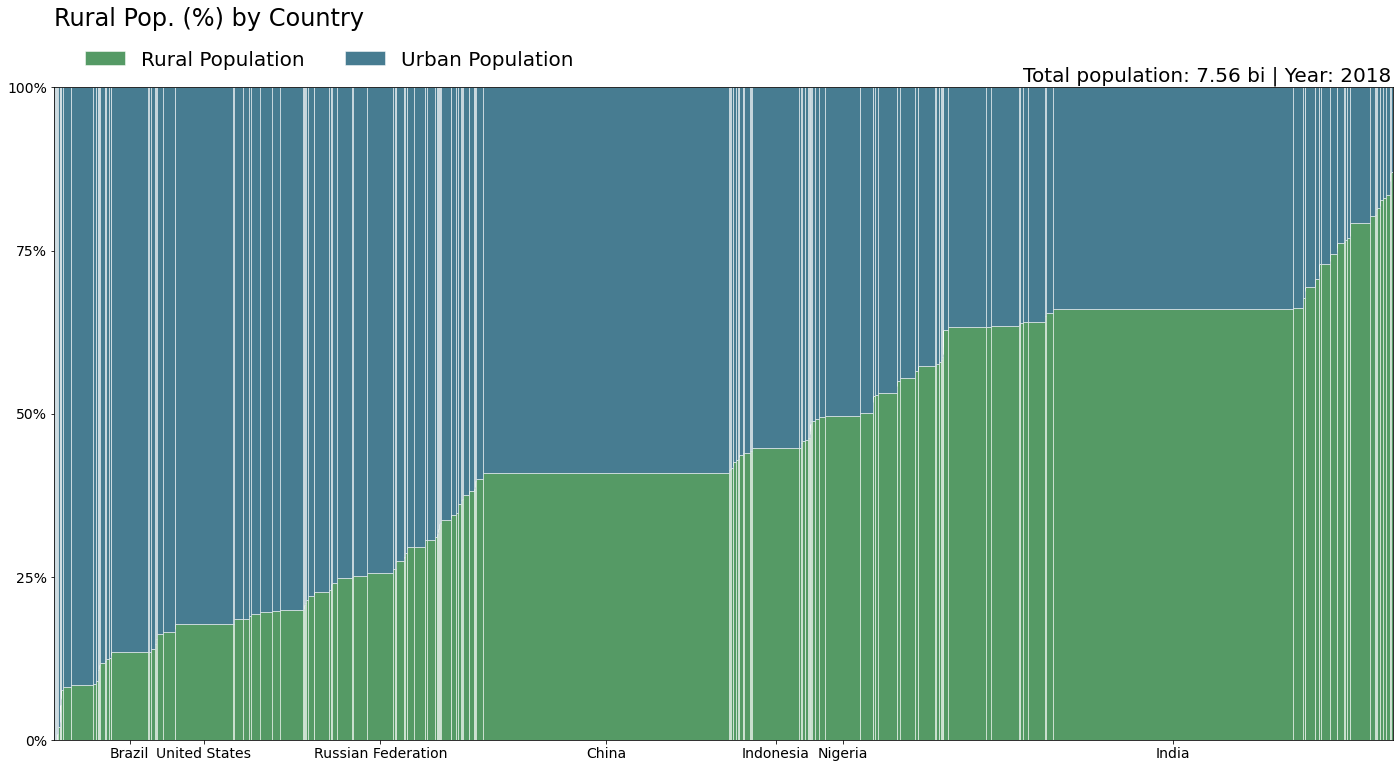

In [9]:
####################
###### Inputs ######
####################

year = 2018
countries_select = "All"
indicator = 'Rural Population'
countries = countries_dict[countries_select]
highlight = highlights_dict[countries_select]

##################
###### DATA ######
##################
pop_file = 'API_SP.POP.TOTL_DS2_en_csv_v2_2163507.csv'

df = pd.read_csv('../data/'+pop_file)
var_df = pd.read_csv('../data/'+var_dict[indicator]['file'])

df = df.merge(var_df, 
              left_on='Country Name', 
              right_on='Country Name', 
              suffixes=['_pop', '_var_df'])

# remove non-countries
df = df[df['Country Name'].isin(countries)]

# remove rows with empty values for the indicator or population
df = df[(df['{}_var_df'.format(year)].notna() & df['{}_pop'.format(year)].notna())]

# sort rows by the indicator values 
df.sort_values('{}_var_df'.format(year), inplace=True)

# get y
y = df['{}_var_df'.format(year)]/100

# get the width of the bars (population / 1mi)
width = df['{}_pop'.format(year)].values / 1000000

# calculate the x position of each country
# x is the cummulative sum of all previous widths
x = [0]
temp = 0
for i in width[:-1]:
    temp += i
    x.append(temp)

# create lists with the x ticks positions and labels
# based on a list of countries we want to highlight
xticks_pos = []
xticks_labels = [] 
for i, v in enumerate(df['Country Name']):
    if v in highlight:
        xticks_pos.append(width[i]/2 + x[i])
        xticks_labels.append(v)

##########################
########## PLOT ##########
##########################
# define figure and axis
fig, ax = plt.subplots(1, figsize=(24,12))

# var_df bars
plt.bar(x, y, align='edge', width=width, edgecolor='w', linewidth = 0.5, color='#559A65')
plt.bar(x, np.ones(len(y))-y, bottom=y, align='edge', width=width, edgecolor='w', linewidth = 0.5, color='#477C91')

# xy limits
plt.xlim(0, x[-1]+width[-1])
plt.ylim(0,1)

# xy ticks
plt.xticks(xticks_pos, xticks_labels, fontsize=14)
plt.yticks(np.arange(0,1.1,0.25), 
          ['{:.0f}%'.format(i*100) for i in np.arange(0,1.1,0.25)],
          fontsize=14)

# Add notes (Total population and Year)
total_pop = df['{}_pop'.format(year)].sum()
if total_pop > 1000000000:
    total_pop = '{:.2f} bi'.format(total_pop/1000000000)
elif total_pop > 1000000:
    total_pop = '{:.2f} mi'.format(total_pop/1000000)
else:
    total_pop = '{:.2f}'.format(total_pop)
    
notes = 'Total population: {} | Year: {}'.format(total_pop, year)
plt.text(x[-1], 1.01, notes, ha='right', fontsize=20)
    
# title and legend
plt.legend(var_dict[indicator]['legend'], ncol=2, 
           frameon=False, bbox_to_anchor=(0.01,1), fontsize=20)
plt.title('{} by Country\n\n'.format(var_dict[indicator]['label']), 
          loc='left', fontsize=24)

plt.show()

## Function

In [10]:
def marimekko(countries_select, indicator, year, countries, highlight):
    ##################
    ###### DATA ######
    ##################
    pop_file = 'API_SP.POP.TOTL_DS2_en_csv_v2_2163507.csv'

    df = pd.read_csv('../data/'+pop_file)
    var_df = pd.read_csv('../data/'+var_dict[indicator]['file'])

    df = df.merge(var_df, 
                  left_on='Country Name', 
                  right_on='Country Name', 
                  suffixes=['_pop', '_var_df'])

    # remove non-countries
    df = df[df['Country Name'].isin(countries)]

    # remove rows with empty values for the indicator or population
    df = df[(df['{}_var_df'.format(year)].notna() & df['{}_pop'.format(year)].notna())]

    # sort rows by the indicator values 
    df.sort_values('{}_var_df'.format(year), inplace=True)

    # get y
    y = df['{}_var_df'.format(year)]/100

    # get the width of the bars (population / 1mi)
    width = df['{}_pop'.format(year)].values / 1000000

    # calculate the x position of each country
    # x is the cummulative sum of all previous widths
    x = [0]
    temp = 0
    for i in width[:-1]:
        temp += i
        x.append(temp)

    # create lists with the x ticks positions and labels
    # based on a list of countries we want to highlight
    xticks_pos = []
    xticks_labels = [] 
    for i, v in enumerate(df['Country Name']):
        if v in highlight:
            xticks_pos.append(width[i]/2 + x[i])
            xticks_labels.append(v)
            
    ##########################
    ########## PLOT ##########
    ##########################
    # define figure and axis
    fig, ax = plt.subplots(1, figsize=(24,12))

    # var_df bars
    plt.bar(x, y, align='edge', width=width, edgecolor='w', linewidth = 0.5, color='#559A65')
    plt.bar(x, np.ones(len(y))-y, bottom=y, align='edge', width=width, edgecolor='w', linewidth = 0.5, color='#477C91')
    
    # Add notes (Total population and Year)
    total_pop = df['{}_pop'.format(year)].sum()
    if total_pop > 1000000000:
        total_pop = '{:.2f} bi'.format(total_pop/1000000000)
    elif total_pop > 1000000:
        total_pop = '{:.2f} mi'.format(total_pop/1000000)
    else:
        total_pop = '{:.2f}'.format(total_pop)

    notes = 'Total population: {} | Year: {}'.format(total_pop, year)
    plt.text(x[-1], 1.07, notes, ha='right', fontsize=20)

    # title and legend
    plt.legend(var_dict[indicator]['legend'], ncol=2, loc='upper left',
               frameon=False, bbox_to_anchor=(0,1.11), fontsize=20)
    plt.title('{} by Country\n\n'.format(var_dict[indicator]['label']), 
              loc='left', fontsize=24)
    
    
    # xy limits
    plt.xlim(0, x[-1]+width[-1])
    plt.ylim(0,1)

    # xy ticks
    plt.xticks(xticks_pos, xticks_labels, fontsize=14)
    plt.yticks(np.arange(0,1.1,0.25), 
              ['{:.0f}%'.format(i*100) for i in np.arange(0,1.1,0.25)],
              fontsize=14)
    # twin y-axis to draw x-ticks at the top
    axy = ax.twiny()
    # max value on the x axis
    max_x = (x[-1] + width[-1])
    # get the values for 0%, 25%, 50%, 75%, and 100%
    x_ticks_percent = np.arange(0, max_x+1, max_x/4)
    # set ticks and labels
    axy.set_xticks(x_ticks_percent)
    axy.set_xticklabels(['{:.0f}%'.format(i*100) for i in x_ticks_percent/max_x], 
                        fontsize=14)
    plt.savefig('chart.png')


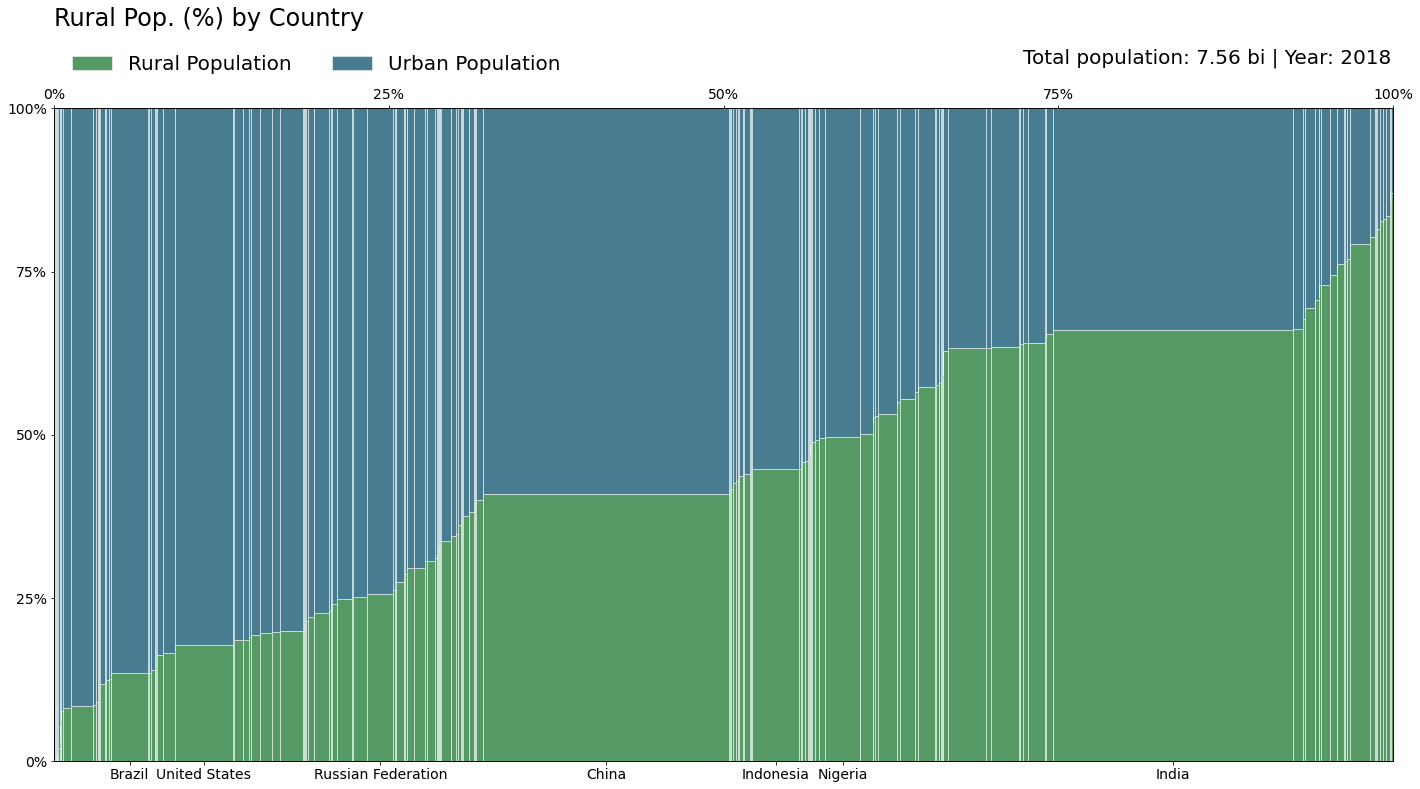

In [11]:
year = 2018
countries_select = "All"
indicator = 'Rural Population'
countries = countries_dict[countries_select]
highlight = highlights_dict[countries_select]

marimekko(countries_select, indicator, year, countries, highlight)

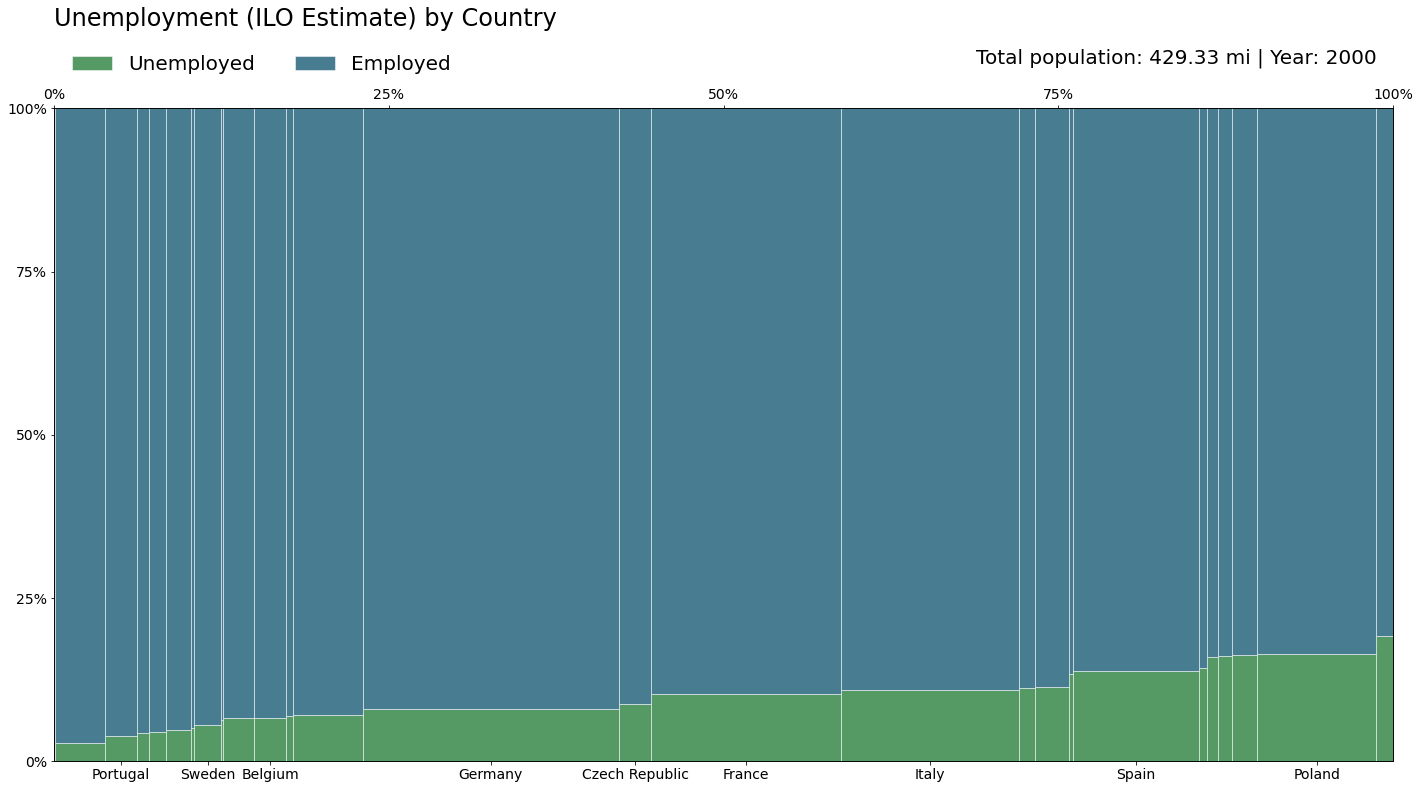

In [12]:
year = 2000
countries_select = "European Union"
indicator = 'Unemployment'
countries = countries_dict[countries_select]
highlight = ['Belgium', 'Czech Republic', 'France', 'Germany', 
             'Italy', 'Poland', 'Portugal', 'Spain', 'Sweden']

marimekko(countries_select, indicator, year, countries, highlight)